In [152]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

Tenemos
$$X(t + dt) = X(t) + \sqrt{\delta^2 dt}N^{t + dt}_t (0, 1) = X(t) + N^{t + dt}_t(0, \delta^2 dt).$$

In [156]:
def Einstein_walk(x0, tmax, dt, delta):
    stdv = np.sqrt(delta**2 * dt)
    N = int(tmax / dt)
    X = np.zeros(N)
    X[0] = x0
    for n in range(1, N):
        X[n] = X[n - 1] + np.random.normal(0, stdv)
    return X

In [157]:
# a)
delta = 1
tmax = 10
x0 = 0
dts = np.array([1, 0.1, 0.01])
walks = [Einstein_walk(x0, tmax, dt, delta) for dt in dts]

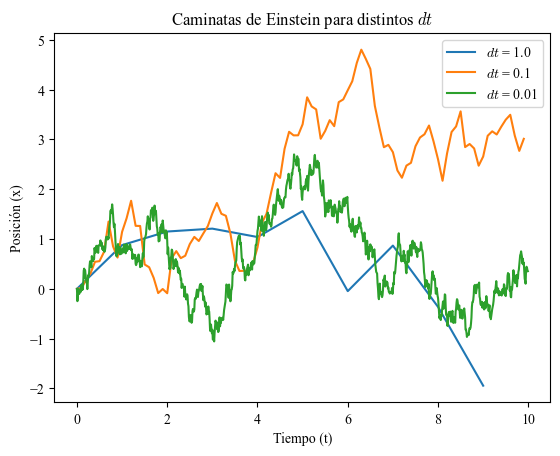

In [158]:
# b)
fig, ax = plt.subplots()

for dt, walk in zip(dts, walks):
    ax.plot(np.arange(0, tmax, dt), walk, label=f"$dt$ = {dt}")
ax.set(title="Caminatas de Einstein para distintos $dt$", xlabel="Tiempo (t)", ylabel="Posición (x)")
plt.legend()
plt.savefig("dts.png")
plt.show()

In [159]:
# c)
n_trayectorias = 10**3
final_positions = []

for dt in dts:
    final_position = []
    for n in range(n_trayectorias):
        final_position.append(Einstein_walk(x0, tmax, dt, delta)[-1])
    final_positions.append(np.array(final_position))

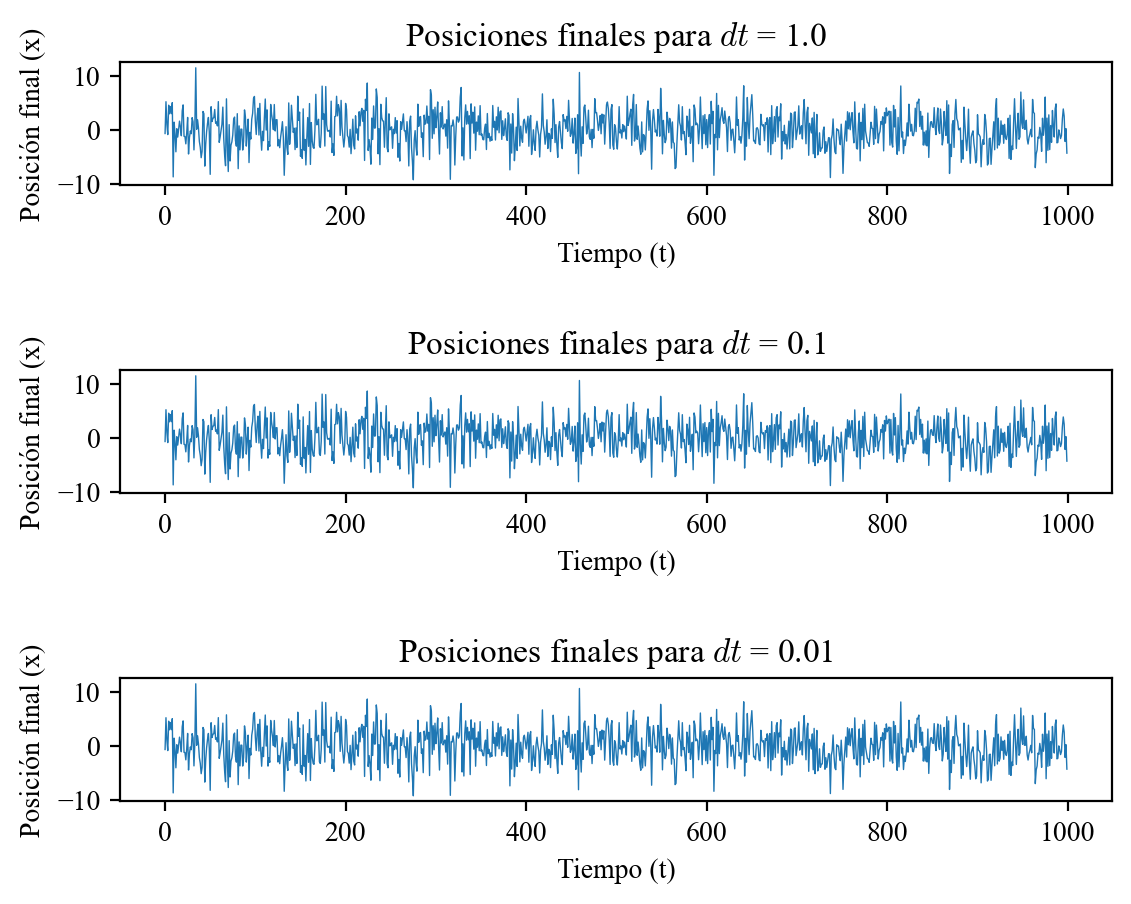

In [160]:
# d)
fig, axs = plt.subplot_mosaic([[1], [2], [3]], dpi=200)

for ax_label, dt, walk in zip(axs, dts, final_positions):
    axs[ax_label].plot(final_position, label=f"$dt$ = {dt}", lw=0.5)
    axs[ax_label].set(title=f"Posiciones finales para $dt$ = {dt}", xlabel="Tiempo (t)", ylabel="Posición final (x)")
plt.subplots_adjust(hspace=1.5)
plt.savefig("final_positions.png")
plt.show()

In [161]:
for dt, final_position in zip(dts, final_positions):
    print(f"dt = {dt}, sigma^2 = {final_position.std()**2}")

dt = 1.0, sigma^2 = 9.497434462649258
dt = 0.1, sigma^2 = 9.471117602853052
dt = 0.01, sigma^2 = 10.354051081760504


Puesto que $X$, $Y$ son estadísticamente independientes, tenemos dos ecuaciones

$$X(t + dt) = X(t) + \sqrt{\delta^2 dt}N^{t + dt}_t (0, 1) = X(t) + N^{t + dt}_{t, x}(0, \delta^2 dt).$$
$$Y(t + dt) = X(t) + \sqrt{\delta^2 dt}N^{t + dt}_t (0, 1) = Y(t) + N^{t + dt}_{t, y}(0, \delta^2 dt).$$

In [148]:
def Einstein_2dwalk(x0, y0, tmax, dt, delta):
    stdv = np.sqrt(delta**2 * dt)
    N = int(tmax / dt)
    X = np.zeros(N)
    Y = np.zeros(N)
    X[0] = x0
    X[0] = y0
    for n in range(1, N):
        X[n] = X[n - 1] + np.random.normal(0, stdv)
        Y[n] = Y[n - 1] + np.random.normal(0, stdv)
    return X, Y

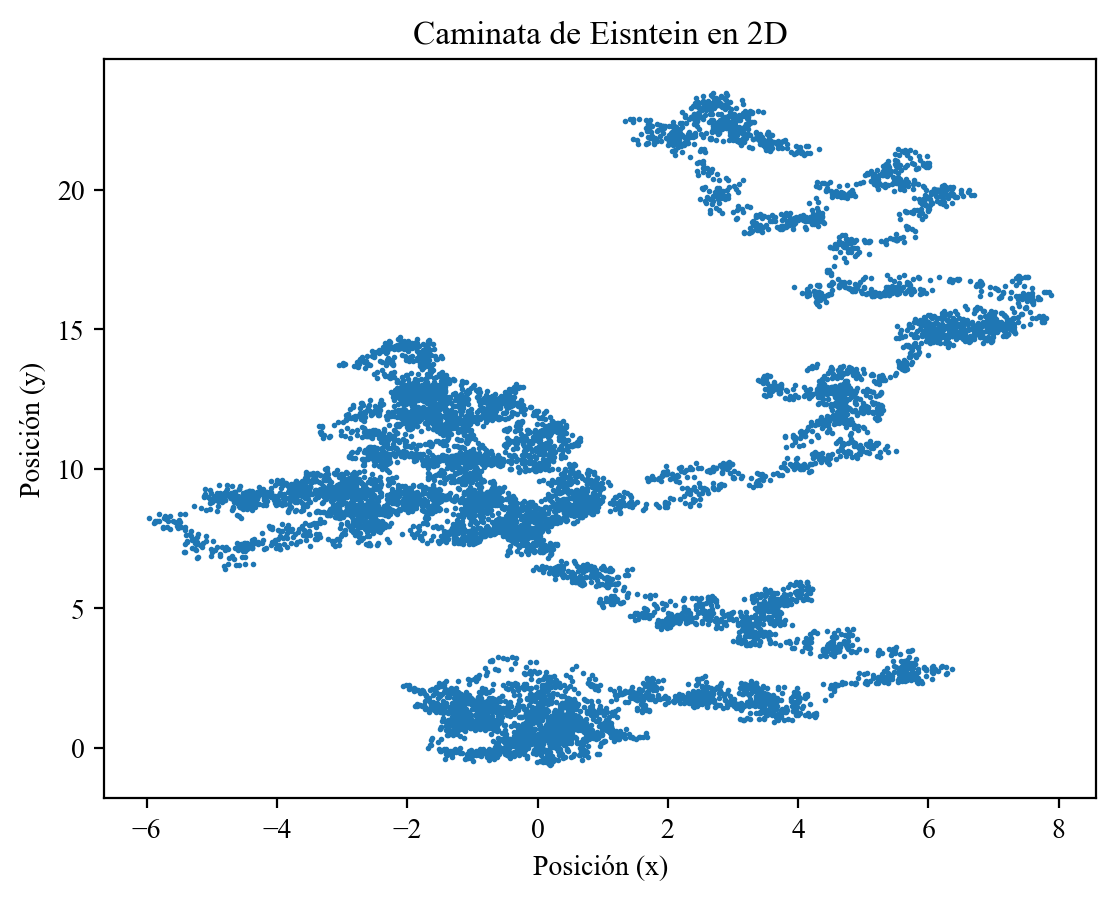

In [147]:
delta = 1
dt = 0.01
tmax = 100
x0, y0 = 0, 0
X, Y = Einstein_2dwalk(x0, y0, tmax, dt, delta)

fig, ax = plt.subplots(dpi=200)
ax.scatter(X, Y, s=1)
ax.set(title="Caminata de Eisntein en 2D", xlabel="Posición (x)", ylabel="Posición (y)")

plt.savefig("walk2D.png")
plt.show()